### 01 packages

In [5]:
##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

import numpy as np

import math

##########################################################################################
##########################################################################################

from shapely.geometry import Point

import networkx as nx

import os

from shapely.geometry import Polygon

##########################################################################################
##########################################################################################

import warnings

warnings.filterwarnings("ignore")

### 02 hexagon class

In [6]:
##########################################################################################
##########################################################################################

length=1e3

##########################################################################################
##########################################################################################

Base_speed=int(10000/60) # 10 KM per hour

##########################################################################################
##########################################################################################

alpha=1

speed=alpha*Base_speed

##########################################################################################
##########################################################################################

batch_interval=1

##########################################################################################
##########################################################################################

fixed_weight=(2*length)/speed

##########################################################################################
##########################################################################################

instance='01'


##########################################################################################
##########################################################################################

Nodes=np.load("./01network/"+instance+"/Nodes.npy")

Edges=np.load("./01network/"+instance+"/Edges.npy")

##########################################################################################
##########################################################################################

Hexagons=np.load("./01network/"+instance+"/Hexagons.npy")

Hexagon_nodes=np.load("./01network/"+instance+"/Hexagon_nodes.npy",allow_pickle=True).item()

Hexagon_edges=np.load("./01network/"+instance+"/Hexagon_edges.npy",allow_pickle=True).item()

##########################################################################################
##########################################################################################

Hexagon_Vertices=np.load("./01network/"+instance+"/Hexagon_Vertices.npy",allow_pickle=True).item()

Hexagon_Center=np.load("./01network/"+instance+"/Hexagon_Center.npy",allow_pickle=True).item()

Hexagons_Neighbors=np.load("./01network/"+instance+"/Hexagons_Neighbors.npy",allow_pickle=True).item()

##########################################################################################
##########################################################################################

Road_Graph = nx.Graph()

for node in Nodes:
    
    node=tuple(node)
        
    Road_Graph.add_node(node)

for edge in Edges:
    
    node1=tuple(edge[0])
    
    node2=tuple(edge[1])
    
    Road_Graph.add_edge(node1, node2, weight=Point(node1).distance(Point(node2)))


### partiontion 1

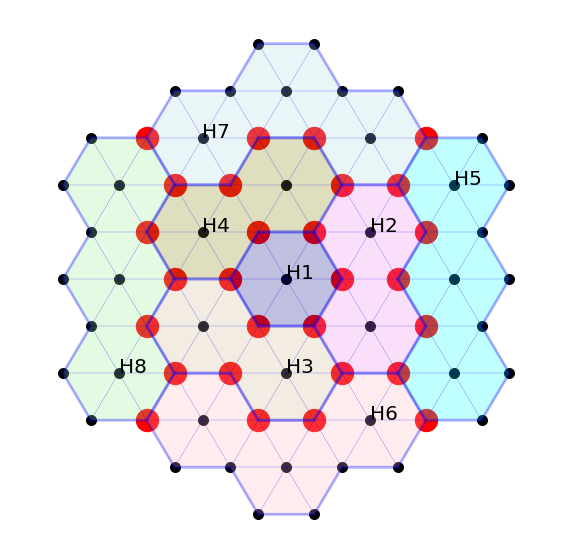

{'H1': ['H2', 'H4', 'H3'],
 'H2': ['H1', 'H4', 'H5', 'H3'],
 'H3': ['H1', 'H2', 'H6', 'H7', 'H4'],
 'H4': ['H1', 'H3', 'H7', 'H8', 'H2'],
 'H5': ['H8', 'H6', 'H2'],
 'H6': ['H2', 'H5', 'H7', 'H3'],
 'H7': ['H6', 'H8', 'H4', 'H3'],
 'H8': ['H4', 'H7', 'H5', 'H2']}

In [7]:
##########################################################################################
##########################################################################################


poly1=Polygon(Hexagon_Vertices['H1'])

##########################################################################################
##########################################################################################

poly2=Polygon(Hexagon_Vertices['H2']).union(Polygon(Hexagon_Vertices['H3']))

poly3=Polygon(Hexagon_Vertices['H4']).union(Polygon(Hexagon_Vertices['H5']))

poly4=Polygon(Hexagon_Vertices['H6']).union(Polygon(Hexagon_Vertices['H7']))


##########################################################################################
##########################################################################################


poly5=Polygon(Hexagon_Vertices['H8']).union(Polygon(Hexagon_Vertices['H9'])).union(Polygon(Hexagon_Vertices['H10']))

poly6=Polygon(Hexagon_Vertices['H11']).union(Polygon(Hexagon_Vertices['H12'])).union(Polygon(Hexagon_Vertices['H13']))

poly7=Polygon(Hexagon_Vertices['H14']).union(Polygon(Hexagon_Vertices['H15'])).union(Polygon(Hexagon_Vertices['H16']))

poly8=Polygon(Hexagon_Vertices['H17']).union(Polygon(Hexagon_Vertices['H18'])).union(Polygon(Hexagon_Vertices['H19']))

    
##########################################################################################
##########################################################################################

Partition_hexagons=['H1','H2','H3','H4','H5','H6','H7','H8']

##########################################################################################
##########################################################################################

Partition_hexagon_vertices={}

Partition_hexagon_vertices['H1']=list(poly1.exterior.coords)

Partition_hexagon_vertices['H2']=list(poly2.exterior.coords)

Partition_hexagon_vertices['H3']=list(poly3.exterior.coords)

Partition_hexagon_vertices['H4']=list(poly4.exterior.coords)

Partition_hexagon_vertices['H5']=list(poly5.exterior.coords)

Partition_hexagon_vertices['H6']=list(poly6.exterior.coords)

Partition_hexagon_vertices['H7']=list(poly7.exterior.coords)

Partition_hexagon_vertices['H8']=list(poly8.exterior.coords)

##########################################################################################
##########################################################################################

Partition_hexagon_nodes={h:list() for h in Partition_hexagons}

for node in Nodes:
    
    if poly1.contains(Point(node)):
        
        Partition_hexagon_nodes['H1'].append(tuple(node))
        
    elif poly2.contains(Point(node)):
        
        Partition_hexagon_nodes['H2'].append(tuple(node))
        
    elif poly3.contains(Point(node)):
        
        Partition_hexagon_nodes['H3'].append(tuple(node))
        
    elif poly4.contains(Point(node)):
        
        Partition_hexagon_nodes['H4'].append(tuple(node))
        
    elif poly5.contains(Point(node)):
        
        Partition_hexagon_nodes['H5'].append(tuple(node))
        
    elif poly6.contains(Point(node)):
        
        Partition_hexagon_nodes['H6'].append(tuple(node))
        
    elif poly7.contains(Point(node)):
        
        Partition_hexagon_nodes['H7'].append(tuple(node))
        
    elif poly8.contains(Point(node)):
        
        Partition_hexagon_nodes['H7'].append(tuple(node))
        
        
for hexagon_in in Partition_hexagons:
    
    Partition_hexagon_nodes[hexagon_in]+=Partition_hexagon_vertices[hexagon_in]

##########################################################################################
##########################################################################################

Lockers=list()

Hexagon_Locker={}

Locker_Hexagon={}

Hexagons_Neighbors={}

for hexagon_id,vertice in Partition_hexagon_vertices.items():
    
    Hexagon_Locker[hexagon_id]=list()
    
    Hexagons_Neighbors[hexagon_id]=list()
    
    for node in vertice:
        
        locker_idx=0
        
        for hexagon_id_,vertice_ in Partition_hexagon_vertices.items():
            
            if node in vertice_ and hexagon_id!=hexagon_id_:
                
                locker_idx=1
                
                break
                
        if locker_idx:
            
            if hexagon_id_ not in Hexagons_Neighbors[hexagon_id]:
            
                Hexagons_Neighbors[hexagon_id].append(hexagon_id_)
            
            if node not in Locker_Hexagon.keys():
                
                Locker_Hexagon[node]=[hexagon_id]
                
            else:
                
                Locker_Hexagon[node].append(hexagon_id)
                
                
                
        if locker_idx and node not in Hexagon_Locker[hexagon_id]:
            
            Hexagon_Locker[hexagon_id].append(node)
                
        if locker_idx and node not in Lockers:
            
            Lockers.append(node)
    
    
##########################################################################################
##########################################################################################

instance='02'

np.save('./01network/'+instance+'/Nodes',Nodes)

np.save('./01network/'+instance+'/Edges',Edges)

np.save('./01network/'+instance+'/Hexagons',Partition_hexagons)

np.save('./01network/'+instance+'/Hexagon_Vertices',Partition_hexagon_vertices)

np.save('./01network/'+instance+'/Hexagon_nodes',Partition_hexagon_nodes)

np.save('./01network/'+instance+'/Hexagons_Neighbors',Hexagons_Neighbors)

np.save('./01network/'+instance+'/Lockers',Lockers)

np.save('./01network/'+instance+'/Locker_Hexagon',Locker_Hexagon)

np.save('./01network/'+instance+'/Hexagon_Locker',Hexagon_Locker)

##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])

for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=.2,linestyle='-')

i=0

colors=['lightblue','lightgreen','lightpink','cyan','olive','tan','violet','navy']

for vertice in list(Partition_hexagon_vertices.values())[::-1]:
    
    axs.fill([x[0] for x in vertice],[x[1] for x in vertice], color=colors[i], edgecolor='blue',linewidth=3,alpha=0.25)
    
    i+=1
    
centers=[center for hexagon_id, center in Hexagon_Center.items() if hexagon_id in ['H1','H2','H6','H4','H8','H11','H14','H17']]

i=1

for center in centers:
    
    axs.text(center[0], center[1], 'H'+str(i), fontsize=20, color='black')
    
    i+=1
    
for node in Road_Graph.nodes:
    
    if node not in Lockers:
    
        axs.scatter(node[0], node[1], color='black',s=100,alpha=1)
        
    else:
        
        axs.scatter(node[0], node[1], color='red',s=500,alpha=1)
    
# Hide the x and y axes

plt.axis('off')

plt.show()

Hexagons_Neighbors

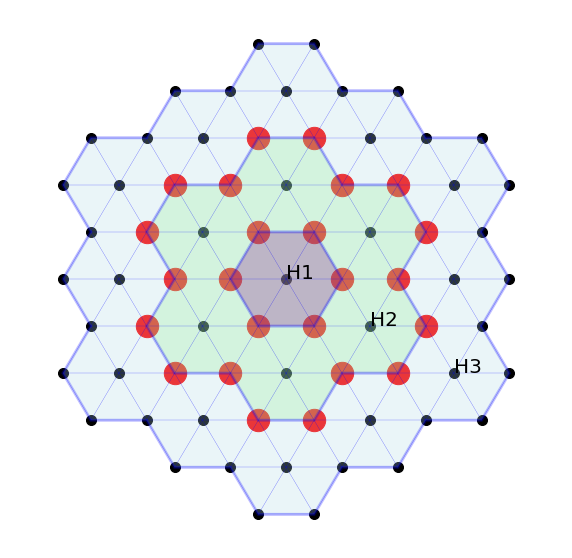

In [12]:
##########################################################################################
##########################################################################################


poly1=Polygon(Hexagon_Vertices['H1'])

##########################################################################################
##########################################################################################

poly2=Polygon(Hexagon_Vertices['H2'])

i=3

while i <=7:

    poly2=poly2.union(Polygon(Hexagon_Vertices['H'+str(i)]))
    
    i+=1

##########################################################################################
##########################################################################################

poly3=Polygon(Hexagon_Vertices['H8'])

while i <=19:

    poly3=poly3.union(Polygon(Hexagon_Vertices['H'+str(i)]))
    
    i+=1
    
##########################################################################################
##########################################################################################

Partition_hexagons=['H1','H2','H3']

##########################################################################################
##########################################################################################

Partition_hexagon_vertices={}

Partition_hexagon_vertices['H1']=list(poly1.exterior.coords)

Partition_hexagon_vertices['H2']=list(poly2.exterior.coords)

Partition_hexagon_vertices['H3']=list(poly3.exterior.coords)

##########################################################################################
##########################################################################################

Partition_hexagon_nodes={h:list() for h in Partition_hexagons}

for node in Nodes:
    
    if poly1.contains(Point(node)):
        
        Partition_hexagon_nodes['H1'].append(tuple(node))
        
    elif poly2.contains(Point(node)):
        
        Partition_hexagon_nodes['H2'].append(tuple(node))
        
    elif poly3.contains(Point(node)):
        
        Partition_hexagon_nodes['H3'].append(tuple(node))
        
Partition_hexagon_nodes['H1']+=Partition_hexagon_vertices['H1']

Partition_hexagon_nodes['H2']+=Partition_hexagon_vertices['H1']

Partition_hexagon_nodes['H2']+=Partition_hexagon_vertices['H2']

Partition_hexagon_nodes['H3']+=Partition_hexagon_vertices['H2']

Partition_hexagon_nodes['H3']+=Partition_hexagon_vertices['H3']
    
##########################################################################################
##########################################################################################

Lockers=list()

Hexagon_Locker={hexagon_id:list() for hexagon_id in Partition_hexagons}

Locker_Hexagon={}

Hexagons_Neighbors={}

for hexagon_id,vertice in list(Partition_hexagon_vertices.items())[:-1]:
    
    next_hexagon_id="H"+str(int(hexagon_id[-1])+1)
    
    Hexagons_Neighbors[hexagon_id]=[next_hexagon_id]
    
    for node in vertice:
        
        Hexagon_Locker[hexagon_id].append(node)
        
        Hexagon_Locker[next_hexagon_id].append(node)
         
        Locker_Hexagon[node]=[hexagon_id,next_hexagon_id]
                
        if node not in Lockers:
            
            Lockers.append(node)

##########################################################################################
##########################################################################################

instance='03'

np.save('./01network/'+instance+'/Nodes',Nodes)

np.save('./01network/'+instance+'/Edges',Edges)

np.save('./01network/'+instance+'/Hexagons',Partition_hexagons)

np.save('./01network/'+instance+'/Hexagon_Vertices',Partition_hexagon_vertices)

np.save('./01network/'+instance+'/Hexagon_nodes',Partition_hexagon_nodes)

np.save('./01network/'+instance+'/Hexagons_Neighbors',Hexagons_Neighbors)

np.save('./01network/'+instance+'/Lockers',Lockers)

np.save('./01network/'+instance+'/Locker_Hexagon',Locker_Hexagon)

np.save('./01network/'+instance+'/Hexagon_Locker',Hexagon_Locker)

##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])

##########################################################################################
##########################################################################################

for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=.2,linestyle='-')

    
##########################################################################################
##########################################################################################

i=0

colors=['lightblue','lightgreen','purple']

for vertice in list(Partition_hexagon_vertices.values())[::-1]:
    
    axs.fill([x[0] for x in vertice],[x[1] for x in vertice], color=colors[i], edgecolor='blue',linewidth=3,alpha=0.25)
    
    i+=1
    
##########################################################################################
##########################################################################################
    
for node in Road_Graph.nodes:
    
    if node not in Lockers:
    
        axs.scatter(node[0], node[1], color='black',s=100,alpha=1)
        
    else:
        
        axs.scatter(node[0], node[1], color='red',s=500,alpha=1)
    
    
##########################################################################################
##########################################################################################

centers=[center for hexagon_id, center in Hexagon_Center.items() if hexagon_id in ['H1','H3','H10']]

i=1

for center in centers:
    
    axs.text(center[0], center[1], 'H'+str(i), fontsize=20, color='black')
    
    i+=1
    

    
    
# Hide the x and y axes

plt.axis('off')

plt.show()



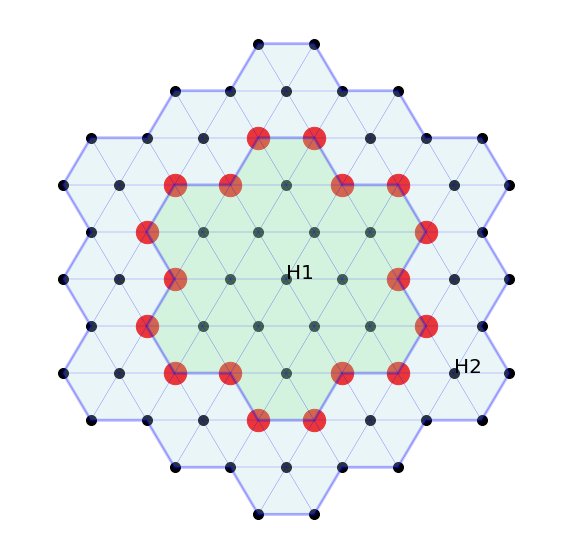

{'H1': ['H2']}

In [15]:
##########################################################################################
##########################################################################################




##########################################################################################
##########################################################################################

poly1=Polygon(Hexagon_Vertices['H1'])

i=2

while i <=7:

    poly1=poly1.union(Polygon(Hexagon_Vertices['H'+str(i)]))
    
    i+=1

##########################################################################################
##########################################################################################

poly2=Polygon(Hexagon_Vertices['H8'])

i=9

while i <=19:

    poly2=poly2.union(Polygon(Hexagon_Vertices['H'+str(i)]))
    
    i+=1
    
##########################################################################################
##########################################################################################

Partition_hexagons=['H1','H2']

##########################################################################################
##########################################################################################

Partition_hexagon_vertices={}

Partition_hexagon_vertices['H1']=list(poly1.exterior.coords)

Partition_hexagon_vertices['H2']=list(poly2.exterior.coords)


##########################################################################################
##########################################################################################

Partition_hexagon_nodes={h:list() for h in Partition_hexagons}

for node in Nodes:
    
    if poly1.contains(Point(node)):
        
        Partition_hexagon_nodes['H1'].append(tuple(node))
        
    elif poly2.contains(Point(node)):
        
        Partition_hexagon_nodes['H2'].append(tuple(node))
        

        
Partition_hexagon_nodes['H1']+=Partition_hexagon_vertices['H1']

Partition_hexagon_nodes['H2']+=Partition_hexagon_vertices['H1']

Partition_hexagon_nodes['H2']+=Partition_hexagon_vertices['H2']


    
##########################################################################################
##########################################################################################

Lockers=list()

Hexagon_Locker={hexagon_id:list() for hexagon_id in Partition_hexagons}

Locker_Hexagon={}

Hexagons_Neighbors={}

for hexagon_id,vertice in list(Partition_hexagon_vertices.items())[:-1]:
    
    next_hexagon_id="H"+str(int(hexagon_id[-1])+1)
    
    Hexagons_Neighbors[hexagon_id]=[next_hexagon_id]
    
    for node in vertice:
        
        Hexagon_Locker[hexagon_id].append(node)
        
        Hexagon_Locker[next_hexagon_id].append(node)
         
        Locker_Hexagon[node]=[hexagon_id,next_hexagon_id]
                
        if node not in Lockers:
            
            Lockers.append(node)

##########################################################################################
##########################################################################################

instance='04'

np.save('./01network/'+instance+'/Nodes',Nodes)

np.save('./01network/'+instance+'/Edges',Edges)

np.save('./01network/'+instance+'/Hexagons',Partition_hexagons)

np.save('./01network/'+instance+'/Hexagon_Vertices',Partition_hexagon_vertices)

np.save('./01network/'+instance+'/Hexagon_nodes',Partition_hexagon_nodes)

np.save('./01network/'+instance+'/Hexagons_Neighbors',Hexagons_Neighbors)

np.save('./01network/'+instance+'/Lockers',Lockers)

np.save('./01network/'+instance+'/Locker_Hexagon',Locker_Hexagon)

np.save('./01network/'+instance+'/Hexagon_Locker',Hexagon_Locker)

##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])

for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=.2,linestyle='-')

i=0

colors=['lightblue','lightgreen','purple']

for vertice in list(Partition_hexagon_vertices.values())[::-1]:
    
    axs.fill([x[0] for x in vertice],[x[1] for x in vertice], color=colors[i], edgecolor='blue',linewidth=3,alpha=0.25)
    
    i+=1
    
centers=[center for hexagon_id, center in Hexagon_Center.items() if hexagon_id in ['H1','H10']]

i=1

for center in centers:
    
    axs.text(center[0], center[1], 'H'+str(i), fontsize=20, color='black')
    
    i+=1
    
for node in Road_Graph.nodes:
    
    if node not in Lockers:
    
        axs.scatter(node[0], node[1], color='black',s=100,alpha=1)
        
    else:
        
        axs.scatter(node[0], node[1], color='red',s=500,alpha=1)
    
    
        
    
# Hide the x and y axes

plt.axis('off')

plt.show()

Hexagons_Neighbors